# Oscar Esaú Peralta Rosales
# Tarea 1: Fundamentos de Minería de Texto

## Actividad 1: Procesamiento básico

In [1]:
import unidecode
import nltk

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.text import Text
from nltk import FreqDist


from bs4 import BeautifulSoup
from matplotlib import pyplot as plt


### 1. Descargue una página web del top de noticias de Google News, guárdela en un archivo de texto plano.


In [2]:
file_name = './data/gnews2.html'

### 2. Investigue el uso de la librería BeautifulSoup de Python para limpiar el formato html de la página.


In [3]:
html = ""

with open(file_name) as fs:
    for line in fs:
        html += " " + line

soup = BeautifulSoup(html, 'html.parser')


In [4]:

content = soup.find(class_='field field-name-body field-type-text-with-summary field-label-hidden')
text = " ".join([p.text for p in content.find_all('p')])

In [5]:
text = unidecode.unidecode(text).lower()
text

'la organizacion mundial de la salud (oms) indico el lunes que el numero de nuevos casos de coronavirus registrados en el mundo en las ultimas 24 horas es ampliamente superior a los detectados en china. "en las ultimas 24 horas, hubo cerca de nueve veces mas nuevos casos de covid-19 registrados fuera de china que en china", declaro el director de la oms, tedros adhanom ghebreyesus, en conferencia de prensa. "si esta covid-19 fuera una epidemia de gripe, actualmente asistiriamos a una transmision generalizada en todo el mundo, y los esfuerzos para contenerla o enlentecerla serian infructuosos", afirmo. tambien lee: ?que es una pandemia? asegurando que "gracias a medidas precoces y fuertes, los paises pueden detener la transmision" del coronavirus.  la epidemia del nuevo coronavirus, que supero este lunes los 3 mil muertos, sigue progresando en el mundo, lo que obligo a la union europea (ue) a aumentar su nivel de alerta en pleno contexto de temor mundial sobre sus consecuencias para la 

### 3. Utilice el objeto RegexpTokenizer de nltk para leerlo, tokenizando con alguna expresión regular para sacar solo secuencias de caracteres de la "a" a la "z". Imprima como resultado los primeros 10 tokens.

In [6]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [7]:
tokens = tokenizer.tokenize(text)

print(tokens[:10])

['la', 'organizacion', 'mundial', 'de', 'la', 'salud', 'oms', 'indico', 'el', 'lunes']


### 4. Cargue la lista de Tokens anteriores en un objeto Text de nltk.

In [8]:
ntext = Text(tokens)

### 5. Visualice la concordancia de alguna palabra.

In [9]:
ntext.concordance('salud')

Displaying 1 of 1 matches:
la organizacion mundial de la salud oms indico el lunes que el numero de


### 6. Imprima con matplotlib las 50 palabras más frecuentes cargadas en un objeto FreqDist de nltk. Antes de este paso remueva las stopword usando un recurso léxico en español de nltk.


In [10]:
tokens = [token for token in tokens if token not in stopwords.words('spanish')]
fdist = FreqDist(tokens)

In [11]:
fdist_sorted = sorted(fdist.items(), key=lambda data: data[1], reverse=True)
print(fdist_sorted[:50])


[('casos', 8), ('lunes', 7), ('coronavirus', 7), ('mil', 6), ('nuevos', 5), ('mundo', 5), ('china', 5), ('mas', 5), ('tambien', 4), ('lee', 4), ('muertos', 4), ('personas', 4), ('pais', 4), ('ultimas', 3), ('covid', 3), ('epidemia', 3), ('virus', 3), ('balance', 3), ('total', 3), ('segundo', 3), ('organizacion', 2), ('mundial', 2), ('oms', 2), ('numero', 2), ('registrados', 2), ('horas', 2), ('cerca', 2), ('transmision', 2), ('medidas', 2), ('paises', 2), ('sigue', 2), ('ue', 2), ('nivel', 2), ('alerta', 2), ('temor', 2), ('enfermedad', 2), ('propagacion', 2), ('lleva', 2), ('contagio', 2), ('menos', 2), ('tras', 2), ('alemania', 2), ('ministro', 2), ('interior', 2), ('mano', 2), ('merkel', 2), ('continente', 2), ('salud', 1), ('indico', 1), ('ampliamente', 1)]


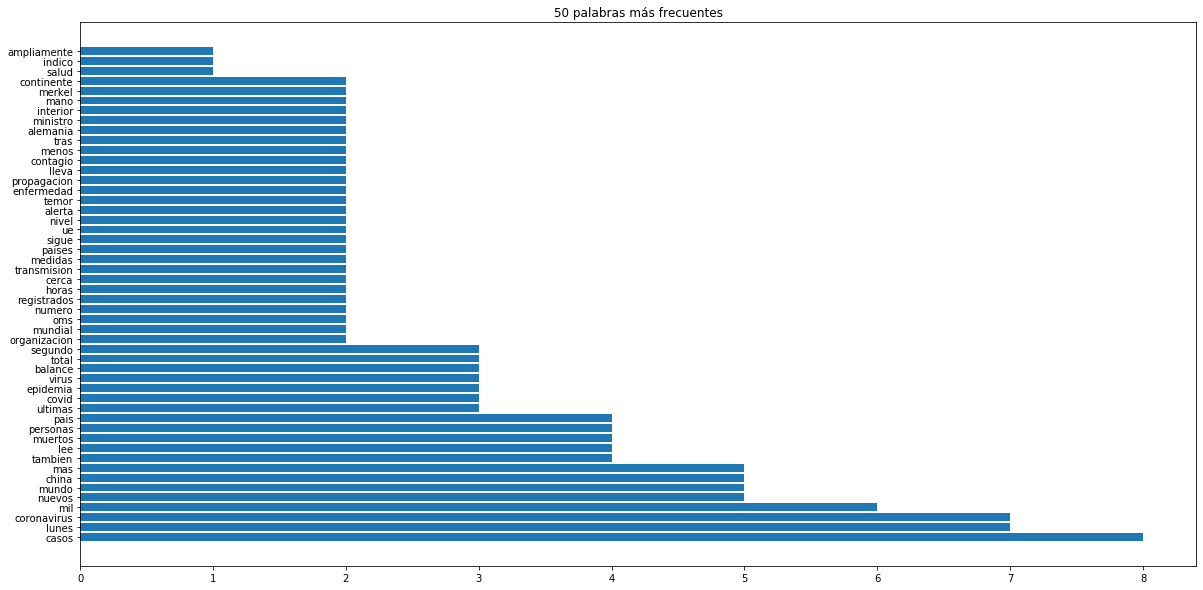

In [12]:
plt.figure(figsize=(20,10))
plt.title('50 palabras más frecuentes')
plt.barh(*zip(*fdist_sorted[:50]))
plt.show()

### 7. Cuente las palabras del vocabulario del documento en cuestión.

In [13]:
# palabras del vocabulario
print('Palabras del vocabulario: %d' % len(set(tokens)))

Palabras del vocabulario: 210


### 8. Imprima las palabras con logitud menor a 5 caracteres pero con frecuencia mayor a 10, usando list-comprehension de python.

In [14]:
print([ word for word, frec in fdist.items() if len(word) < 5 and frec > 10 ])

[]


### 9. Calcule la riqueza léxica.

In [15]:
def lex_div(tokens):
    """ Longitud del texto / palabras únicas """
    return len(tokens)/len(set(tokens))

print(lex_div(tokens))

1.457142857142857


## Actividad 2: Cargando un corpus

In [16]:
import csv
import math

from collections import defaultdict

import numpy as np

from tqdm import tqdm
from nltk.corpus import CategorizedPlaintextCorpusReader
from nltk.tokenize import WordPunctTokenizer 
from nltk.tokenize import TweetTokenizer
from nltk import ConditionalFreqDist

### 1. Cargue el dataset de training de agresividad como un corpus de categorías en nltk. Para referencia, un corpus de categorias es como el Brown corpus visto en clase, y necesita construirse a base del objeto CategorizedPlaintextCorpusReader de nltk.


In [17]:
mex_corpus = CategorizedPlaintextCorpusReader('./data/corpus/', r'.*\.txt', cat_pattern=r'(\w+)/*')

In [18]:
mex_corpus.categories()

['mex_train', 'mex_train_labels', 'mex_val', 'mex_val_labels']

In [19]:
mex_corpus.fileids()

['mex_train.txt', 'mex_train_labels.txt', 'mex_val.txt', 'mex_val_labels.txt']

### 2.  Tokenize cada documento del dataset usando el objeto WordPunctTokenizer de nltk. Imprima la secuencia de tokens de los diez primeros tweets del dataset de agresividad.

In [20]:
tk = WordPunctTokenizer() 
docs = [tk.tokenize(tweet) for tweet in mex_corpus.raw('mex_train.txt').split('\n') if tweet ]

for tokens in docs[:10]:
    print(tokens)

['lo', 'peor', 'de', 'todo', 'es', 'que', 'no', 'me', 'dan', 'por', 'un', 'tiempo', 'y', 'luego', 'vuelven', 'estoy', 'hasta', 'la', 'verga', 'de', 'estl']
['a', 'la', 'vga', 'no', 'seas', 'mamón', '45', 'putos', 'minutos', 'después', 'me', 'dices', 'que', 'apenas', 'sales', 'no', 'me', 'querías', 'avisar', 'en', '3', 'horas', '?', '😑']
['considero', 'que', 'lo', 'más', 'conveniente', 'seria', 'que', 'lo', 'retes', 'a', 'unos', 'vergazos', 'mi', 'jelipe', '!', 'rómpele', 'la', 'madre', 'a', 'ese', 'pinchi', 'joto', '!']
['el', 'marica', 'de', 'mi', 'ex', 'me', 'tiene', 'bloqueada', 'de', 'todo', 'así', 'uno', 'no', 'puede', 'admirar', 'la', '"', 'belleza', '"', 'de', 'su', 'garnacha', '😂']
['mujer', 'despechadaya', 'pinche', 'amlo', 'hazle', 'esta', 'que', 'se', 'pela', 'la', 'loca', '#', 'reynosafollow', '#', 'reynosa']
['putos', '.', 'no', 'tienen', 'madre', '.', 'ambriados', 'mantenidos', '.', 'ojetes', '.', 'como', 'es', 'posible', '.', 'mejor', 'matarlos']
['ustedes', 'si', 'puden

### 3. Tokenize cada documento del dataset usando el objeto TweetTokenizer de nltk. Imprima la secuencia de tokens de los diez primeros tweets del dataset de agresividad.


In [21]:
tk = TweetTokenizer() 
docs = [tk.tokenize(tweet) for tweet in mex_corpus.raw('mex_train.txt').split('\n') if tweet ]

for tokens in docs[:10]:
    print(tokens)

['lo', 'peor', 'de', 'todo', 'es', 'que', 'no', 'me', 'dan', 'por', 'un', 'tiempo', 'y', 'luego', 'vuelven', 'estoy', 'hasta', 'la', 'verga', 'de', 'estl']
['a', 'la', 'vga', 'no', 'seas', 'mamón', '45', 'putos', 'minutos', 'después', 'me', 'dices', 'que', 'apenas', 'sales', 'no', 'me', 'querías', 'avisar', 'en', '3', 'horas', '?', '😑']
['considero', 'que', 'lo', 'más', 'conveniente', 'seria', 'que', 'lo', 'retes', 'a', 'unos', 'vergazos', 'mi', 'jelipe', '!', 'rómpele', 'la', 'madre', 'a', 'ese', 'pinchi', 'joto', '!']
['el', 'marica', 'de', 'mi', 'ex', 'me', 'tiene', 'bloqueada', 'de', 'todo', 'así', 'uno', 'no', 'puede', 'admirar', 'la', '"', 'belleza', '"', 'de', 'su', 'garnacha', '😂']
['mujer', 'despechadaya', 'pinche', 'amlo', 'hazle', 'esta', 'que', 'se', 'pela', 'la', 'loca', '#reynosafollow', '#reynosa']
['putos', '.', 'no', 'tienen', 'madre', '.', 'ambriados', 'mantenidos', '.', 'ojetes', '.', 'como', 'es', 'posible', '.', 'mejor', 'matarlos']
['ustedes', 'si', 'puden', 'anda

### 4. Ordene los tweets por clase, y luego dentro de los tweets agresivos y no agresivos, ordénelos alfabéticamente antes de continuar con el siguiente punto.

In [22]:
clases = [int(tk.tokenize(_class)[0]) for _class in mex_corpus.raw('mex_train_labels.txt').split('\n') if _class ]

In [23]:
def get_docs_by_class(docs, clases, _class):
    _docs = [doc for index, doc in enumerate(docs) if clases[index] == _class ]
    return sorted(docs, key=lambda tokens: ' '.join(tokens))

docs_by_class = { _class: get_docs_by_class(docs, clases, _class) for _class in set(clases) }

In [24]:
for _class in docs_by_class.keys():
    for doc in docs_by_class[_class][:10]:
        print(_class, doc)

0 ['!', 'es', 'verdad', '!', '!', 'luis', 'le', 'manda', 'un', 'saludo', 'a', 'una', 'chica', 'luchona', 'y', 'luis', 'la', 'admira', '!', '!', 'y', 'le', 'doy', 'toda', 'la', 'razón', '!', '!', 'también', 'me', 'sorprendio', '!']
0 ['!', 'omg', 'fire', '!', '!', '!', 'ahi', 'todas', 'cantando', '😂', 'y', 'como', 'estabamos', 'en', 'el', 'receso', 'todos', 'los', 'demás', 'estaban', 'como', 'wtf', 'y', 'otros', 'como', 'yeah', '😂', 'la', 'loca', 'de', 'yo', 'gritando']
0 ['"', '@usuario', 'me', 'traes', 'bien', 'enamorada', 'porque', 'pendeja', 'ya', 'estaba', '.', '"', 'si', '.']
0 ['"', 'abre', 'los', 'putos', 'ojos', '"', 'y', 'otras', 'maneras', 'de', 'decirle', 'a', 'la', 'gente', 'que', 'por', 'favor', 'se', 'fije', '.']
0 ['"', 'aparte', 'de', 'putas', 'pendejas', '"', 'quién', 'nos', 'dijo', 'esa', 'frase', 'alguna', 'vez', '@usuario', '?', '?', '?', '😂', '😂', '😂']
0 ['"', 'aplicaré', 'para', 'medicina', 'familiar', 'y', 'me', 'vale', 'verga', 'lo', 'que', 'piensen', 'los', 'de

### 5. Para los primeros 50 tweets de la clase positiva, imprima por tweet la longitud promedio en palabras, longitud promedio en caracteres, y la diversidad léxica, i.e. palabras únicas en el tweet entre la longitud del tweet en palabras.

In [25]:
def get_char_mean_length(tweet):
    w_lens = np.array([len(token) for token in tweet])
    return np.mean(w_lens)

In [26]:
quantity = 50

words_mean = [len(tweet) for tweet in docs_by_class[1][:quantity]]
print("longitud promedio en palabras: %f" % (np.mean(words_mean)))

longitud promedio en palabras: 20.800000


In [27]:
chars_means = [get_char_mean_length(tweet) for tweet in docs_by_class[1][:quantity]]
print("Longitud promedio en caracteres de los tweets: %f\n" % (np.mean(chars_means)))

print("Longitud promedio en caracteres por tweet:")
for lenght in chars_means:
    print("%.3f" %lenght, end=' ')

Longitud promedio en caracteres de los tweets: 3.768627

Longitud promedio en caracteres por tweet:
3.125 3.500 3.929 3.300 3.300 3.731 3.867 3.440 3.722 4.409 4.000 4.071 3.000 4.100 3.545 3.682 3.842 2.706 4.130 3.469 3.500 3.640 2.964 3.231 3.190 4.167 4.250 3.793 3.138 5.688 4.480 2.812 3.435 3.950 3.121 3.529 4.538 3.500 4.136 3.538 3.864 3.810 3.400 3.150 3.611 3.786 3.583 5.158 5.900 4.700 

In [28]:
print("Diversidad Léxica por tweet:")
for tweet, lv in ((tweet, lex_div(tweet)) for tweet in docs_by_class[0][:quantity]):
    print("Diversidad %.3f => tweet:" %lv, tweet, end='\n')

Diversidad Léxica por tweet:
Diversidad 1.524 => tweet: ['!', 'es', 'verdad', '!', '!', 'luis', 'le', 'manda', 'un', 'saludo', 'a', 'una', 'chica', 'luchona', 'y', 'luis', 'la', 'admira', '!', '!', 'y', 'le', 'doy', 'toda', 'la', 'razón', '!', '!', 'también', 'me', 'sorprendio', '!']
Diversidad 1.280 => tweet: ['!', 'omg', 'fire', '!', '!', '!', 'ahi', 'todas', 'cantando', '😂', 'y', 'como', 'estabamos', 'en', 'el', 'receso', 'todos', 'los', 'demás', 'estaban', 'como', 'wtf', 'y', 'otros', 'como', 'yeah', '😂', 'la', 'loca', 'de', 'yo', 'gritando']
Diversidad 1.167 => tweet: ['"', '@usuario', 'me', 'traes', 'bien', 'enamorada', 'porque', 'pendeja', 'ya', 'estaba', '.', '"', 'si', '.']
Diversidad 1.053 => tweet: ['"', 'abre', 'los', 'putos', 'ojos', '"', 'y', 'otras', 'maneras', 'de', 'decirle', 'a', 'la', 'gente', 'que', 'por', 'favor', 'se', 'fije', '.']
Diversidad 1.333 => tweet: ['"', 'aparte', 'de', 'putas', 'pendejas', '"', 'quién', 'nos', 'dijo', 'esa', 'frase', 'alguna', 'vez', '@

### 6. Elabore un comentario sobre el punto anterior y si cree que este tipo de información podría ser útil para la detección de agresividad.

En promedio los tweets son muy cortos en este caso el promedio es de 21 palabras y se usan palabras simples de 3 o 4 letras. Al ser estos cortos la diversidad léxic es cercana a uno, puesto que no se repiten muchas palabras. 

No encuentro una relación de usar la información anterior para detectar agresividad. Intuitivamente los tweets con esta carácteristica son bastan más cortos pues son muy directos con el insulto u ofenza

'#aestatardelefalta', 'toda', 'mi', 'tarea', 'del', 'puto', 'de', 'ociel', 'alv', '😭'

'#acropolispuebla', 'putos', 'rateros', 'de', 'mierda', 'no', 'respetan', 'lugar', 'de', 'compra'

### 7. Utilizando el objeto ConditionalFreqDist de nltk visualize de manera tabular la distribución de las 5 palabras con mayor TFIDF del corpus para cada clase. Elabore un comentario sobre esto.


In [29]:

def compute_tfidf(corpus):
    """
        TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
        IDF(t) = log_e(Total number of documents / Number of documents with term t in it)
    """
    cfdist_tfidf = ConditionalFreqDist()
    # cfdist_count = ConditionalFreqDist()
    frecs_history = [FreqDist(doc) for doc in corpus]

    tfidfs_log = defaultdict(list)

    for index_doc, doc in enumerate(tqdm(corpus)):
        fdist_doc = frecs_history[index_doc]
        for word in fdist_doc:
            tf = fdist_doc[word] / len(fdist_doc)
            doc_count = np.sum([True if word in fh else False for fh in frecs_history])
            idf = math.log(len(corpus) / doc_count)
            cfdist_tfidf[index_doc][word] = tf * idf
            # cfdist_count[index_doc][word] += 1
            tfidfs_log[word].append(tf * idf)

    # return cfdist_tfidf, cfdist_count, tfidfs_log
    return cfdist_tfidf, tfidfs_log

##### Histogramas del top 5 para la clase 0

In [30]:
cfdist_tfidf, tfidfs_log = compute_tfidf(docs_by_class[0])

100%|██████████| 5544/5544 [01:19<00:00, 70.03it/s]


In [31]:
top = 5
tfidf_top = sorted(tfidfs_log.items(), key=lambda item: np.sum(item[1]), reverse=True)[:top]

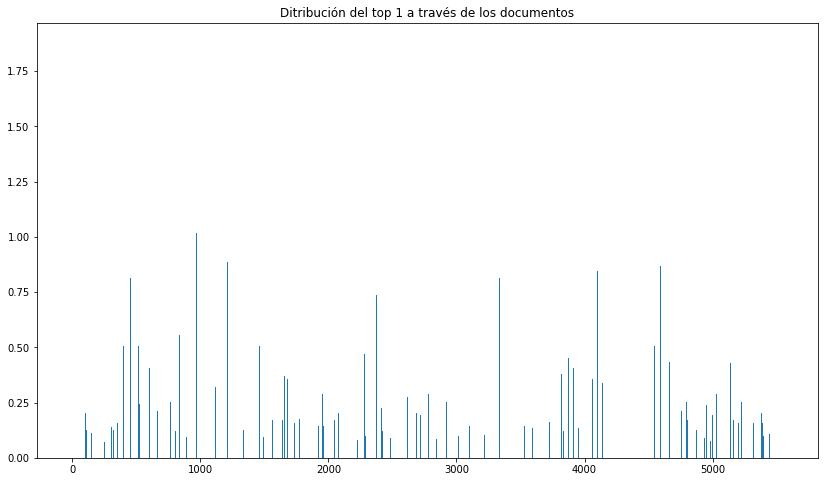

In [32]:
y = [cfdist_tfidf[doc].get(tfidf_top[0][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14,8))
plt.title('Ditribución del top 1 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

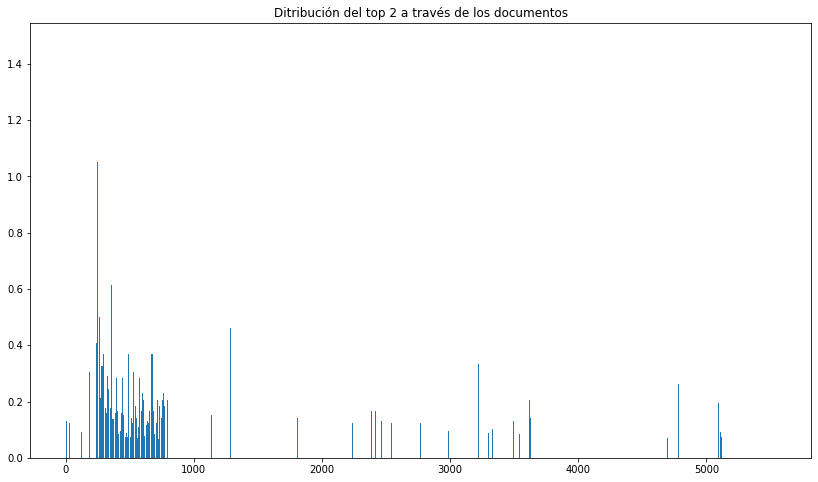

In [33]:
y = [cfdist_tfidf[doc].get(tfidf_top[1][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14,8))
plt.title('Ditribución del top 2 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

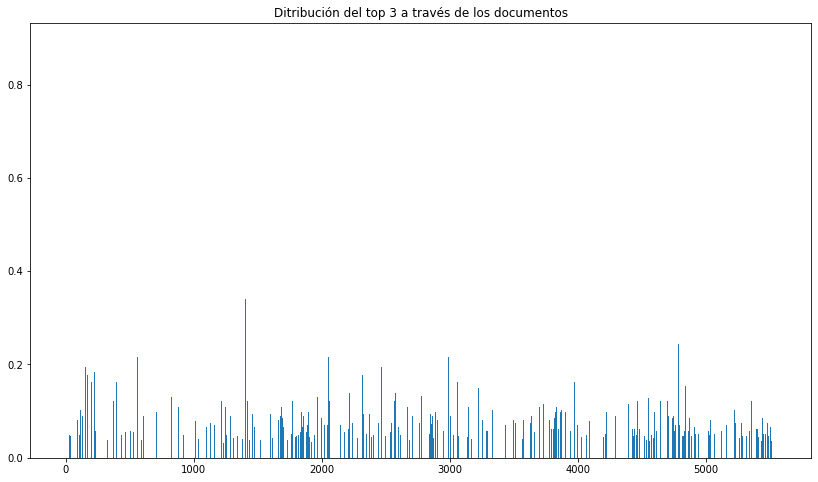

In [34]:
y = [cfdist_tfidf[doc].get(tfidf_top[2][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14,8))
plt.title('Ditribución del top 3 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

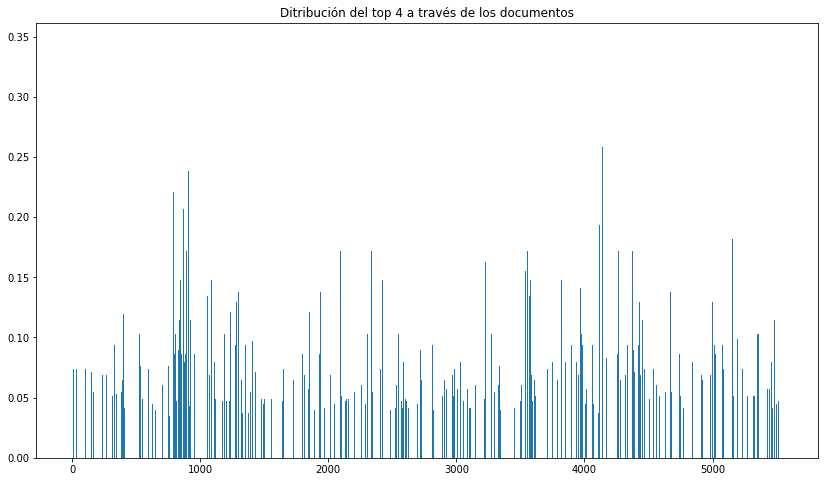

In [35]:
y = [cfdist_tfidf[doc].get(tfidf_top[3][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14, 8))
plt.title('Ditribución del top 4 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

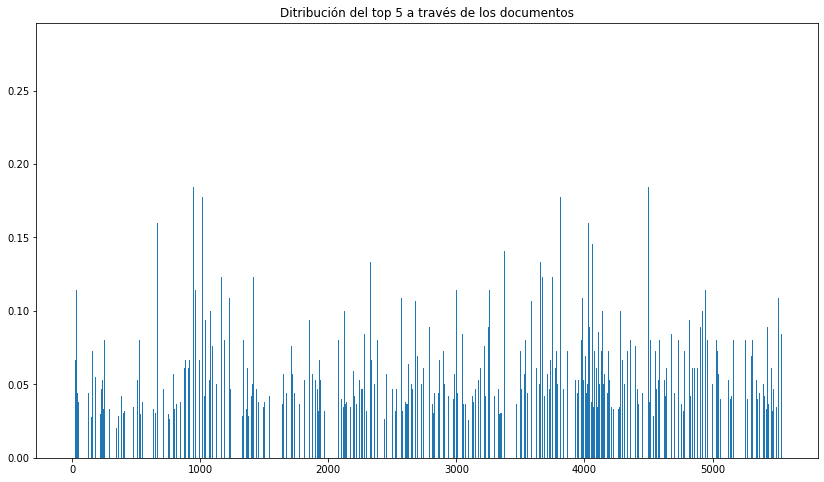

In [36]:
y = [cfdist_tfidf[doc].get(tfidf_top[4][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14, 8))
plt.title('Ditribución del top 5 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

##### Histogramas para el top 5 para la clase 1

In [37]:
cfdist_tfidf, tfidfs_log = compute_tfidf(docs_by_class[1])

100%|██████████| 5544/5544 [01:19<00:00, 69.51it/s]


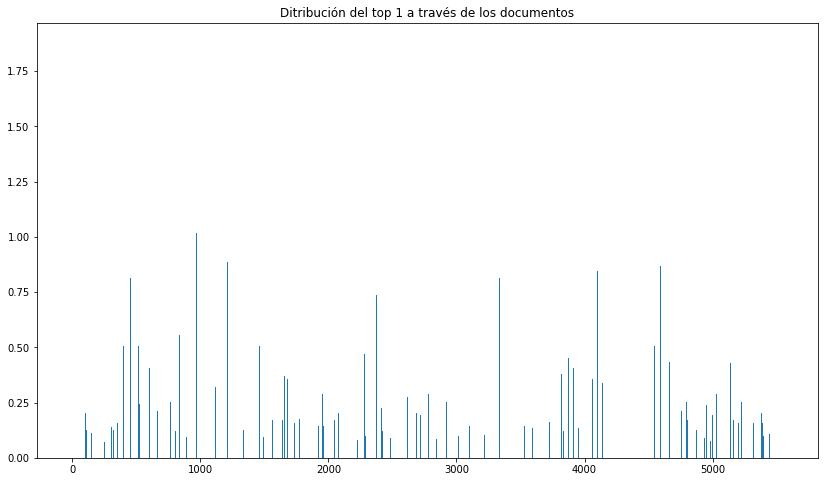

In [38]:
y = [cfdist_tfidf[doc].get(tfidf_top[0][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14, 8))
plt.title('Ditribución del top 1 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

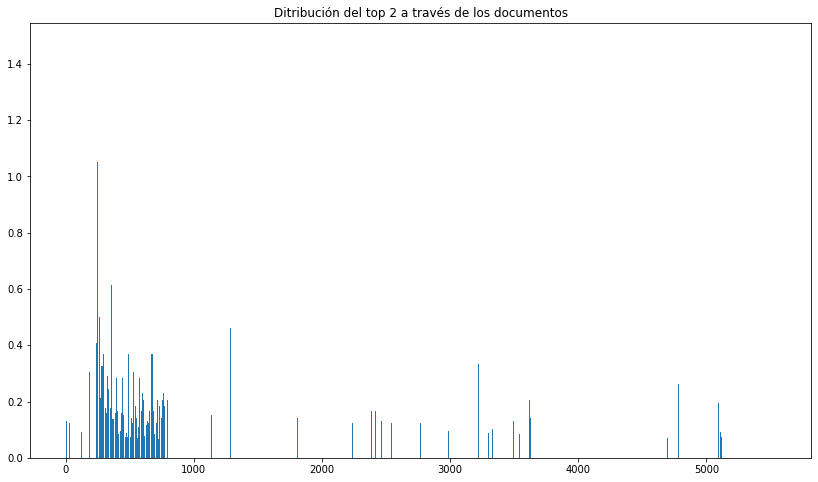

In [39]:
y = [cfdist_tfidf[doc].get(tfidf_top[1][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14, 8))
plt.title('Ditribución del top 2 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

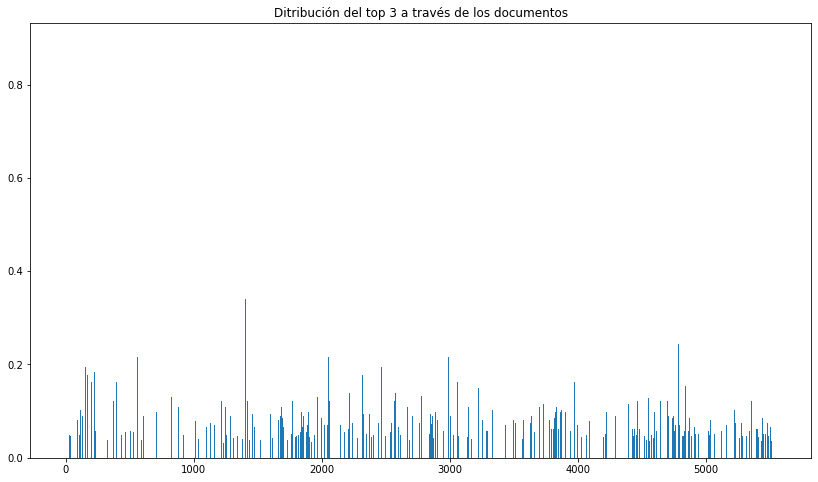

In [40]:
y = [cfdist_tfidf[doc].get(tfidf_top[2][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14, 8))
plt.title('Ditribución del top 3 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

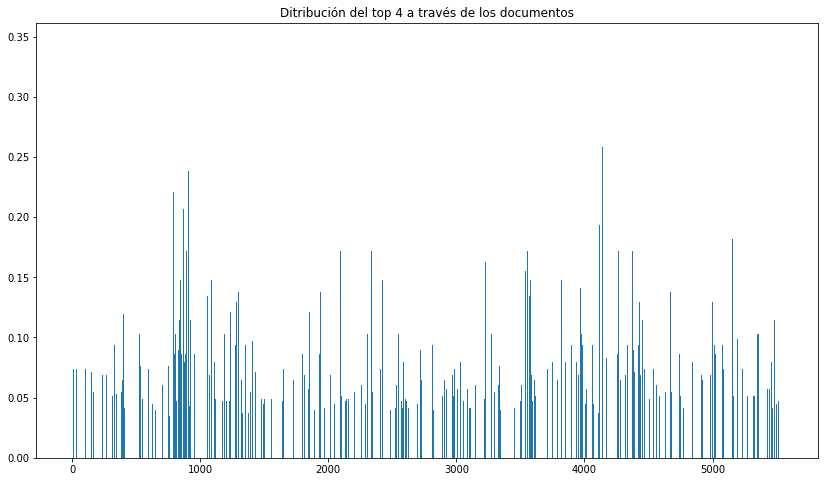

In [41]:
y = [cfdist_tfidf[doc].get(tfidf_top[3][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14, 8))
plt.title('Ditribución del top 4 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

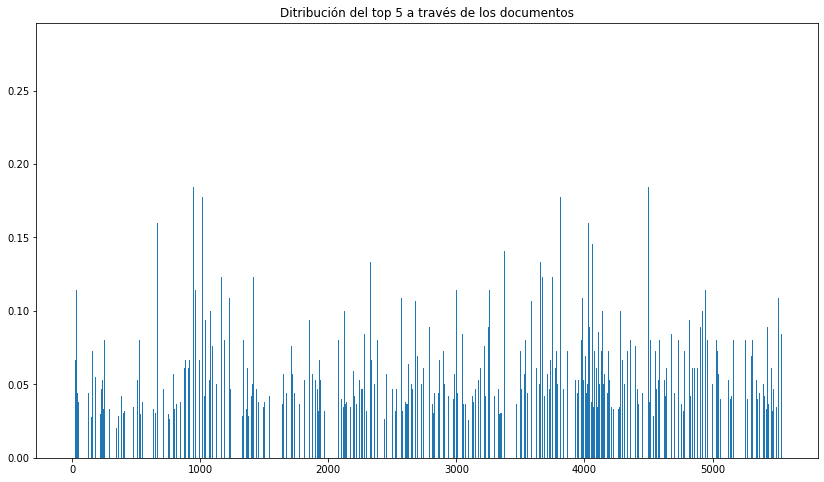

In [42]:
y = [cfdist_tfidf[doc].get(tfidf_top[4][0], 0) for doc in cfdist_tfidf.keys()]

plt.figure(figsize=(14, 8))
plt.title('Ditribución del top 5 a través de los documentos')
plt.xlabel = 'Quantity of components'
plt.ylabel = 'Explained variance ratio'
plt.bar(range(len(y)) , y)
plt.show()

Como se observa en las gráficas, mientras tengan un valor más alto de tfidf estás se encuentra acumuladas más en solo algunos docs,
mientras más va decreciendo, la distribución su vuelve un poco más uniforme a lo largo de los documentos.

### 8. Haga una versión fonética del corpus usando algún diccionario. Ejemplo: https://github.com/Kyubyong/pron_dictionaries

In [43]:
# Reading phonemes dict
file_name = './data/phonemes_dict/es.csv'

phonemes = {}

with open(file_name, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        phonemes[row[0]] = ' '.join(row[1:]).replace(' ', '')

In [44]:
corpus_phoneme = [[phonemes.get(word, word) for word in doc] for doc in docs]

for tweet in corpus_phoneme[:5]:
    print(' '.join(tweet))

lo̞ peˈoɾ ðe ˈtoðo es ke no me dan ˈpoɾ ˈun ˈtjempo i ˈlweɣo vuelven estoy ˈasta la ˈbeɾɰa ðe estl
a la vga no ˈseas maˈmon 45 putos miˈnutos desˈpwes me dices ke apenas sales no me querías avisar en 3 horas ? 😑
considero ke lo̞ ˈmas konβeˈnjen̪te seria ke lo̞ retes a ˈunos vergazos mi jelipe ! rómpele la ˈmaðɾe a ˈese pinchi ˈxoto !
el maˈɾika ðe mi eks me tiene bloqueada ðe ˈtoðo así uno no ˈpweðe admiˈɾaɾ la " beˈʝeθa " ðe su garnacha 😂
muˈxeɾ despechadaya ˈpintʃe amlo hazle ˈesta ke se pela la loca #reynosafollow #reynosa
